<a href="https://colab.research.google.com/github/Kosonora/Protein-conformation/blob/main/Walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#   █████╗ ███████╗███████╗██████╗  ██████╗ ██████╗ ██╗  ██╗
#  ██╔══██╗██╔════╝██╔════╝╚════██╗██╔═████╗╚════██╗██║  ██║
#  ███████║█████╗  █████╗   █████╔╝██║██╔██║ █████╔╝███████║
#  ██╔══██║██╔══╝  ██╔══╝  ██╔═══╝ ████╔╝██║██╔═══╝ ╚════██║
#  ██║  ██║██║     ██║     ███████╗╚██████╔╝███████╗     ██║
#  ╚═╝  ╚═╝╚═╝     ╚═╝     ╚══════╝ ╚═════╝ ╚══════╝     ╚═╝
#
#  ┏┓┓  ┓   ┏┓  ┓ ┓┏┓  ╻  ┏┓           •
#  ┣┫┃┏┓┣┓┏┓┣ ┏┓┃┏┫┏┛ ━╋━ ┣ ┏┓┓┏┏╋┏┓┏┓╋┓┏┓┏┓
#  ┛┗┗┣┛┛┗┗┻┻ ┗┛┗┗┻┗━  ╹  ┻ ┛ ┗┛┛┗┛ ┗┻┗┗┗┛┛┗
#     ┛
#       Predicting protein conformational motions
#  using energetic frustration analysis and AlphaFold2
#
#
#  VERSION Aug-01-2024

In [2]:
# ACCESS
repo_url = 'https://github.com/Gxy-with-luv/AFF2024.git'

# Clone the repository
!git clone {repo_url}

Cloning into 'AFF2024'...
remote: Enumerating objects: 5058, done.
remote: Counting objects: 100% (1575/1575), done.
remote: Compressing objects: 100% (576/576), done.
remote: Total 5058 (delta 1368), reused 1173 (delta 997), pack-reused 3483 (from 1)
Receiving objects: 100% (5058/5058), 168.98 MiB | 26.52 MiB/s, done.
Resolving deltas: 100% (3536/3536), done.
Updating files: 100% (3850/3850), done.


问候
这是我们的快速演练笔记本。

借助此笔记本，可以使用 AdK（以闭合构象为原生状态）的基于物理的挫折信息从 MSA 空间映射挫折能量景观，然后使用高 ΔEHF 区域、掩蔽和混合方法生成替代开放状态。
这是最简单的演练。有关所有代码，请参阅我们的 Github 存储库：AFF2024

本笔记本的结构如下：
问候
安装和加载先决条件
挫折和能量：计算和加载
构建挫折能量景观
从低 ΔEHF 区域到高 ΔEHF 区域采样（滑动方法）
使用混合方法生成亚稳态（AdK 开放状态）以及构象变化途径
使用 HF 位点掩蔽方法生成亚稳态（AdK 开放状态）以及构象变化途径

我们的 github 存储库的结构：
核心预测部分：
使用 Colab 是一种方便的方式来安装和加载与 AF2 相关的模块，而无需环境配置的负担。我们提供了一个笔记本：Main_Prediction.ipynb 来加载和使用 AlphaFold2，从我们自己给出的 MSA 提示中预测结构。


# Greetings

This is our notebook for a quick walkthrough.

With this one can get a frustration-energy landscape mapped from the MSA space using physically-based frustration information for AdK (with closed conformation as the native state) and then generate the alternative open state using High $\Delta E_{HF}$ region, masking and mixing methods.

**This is the simplist walkthough. For all codes, please refer to our Github repository: AFF2024**

## The structure of this notebook is listed as following:
- Greetings
- Installing & loading the prerequesites
- Frustration and Energy: Calculation and loading
- Building **the frustration-energy landscape**
- Sampling from low-$\Delta E_{HF}$ region to high-$\Delta E_{HF}$ region (**Sliding methods**)
- Generating metastable state (AdK open state) and also conformational changing pathway using **mixing methods**
- Generating metastable state (AdK open state) and also conformational changing pathway using HF-site **masking methods**



## The structure of our github repository:
### Core prediction part:

Using Colab is a convenient way to install and load AF2-related modules without the burden of configurations for environment. We provide a notebook: `Main_Prediction.ipynb` to load and use AlphaFold2, to predict structures from the MSA hints given by ourselves.

### AdK Folder:

``` bash
AdK # Every sub-folder also contain scripts for analysis and output results
├── Frustration-Energy-space # Mapping the MSA space onto the Frustration-Energy surface
│  ├── circ50 # Sliding from low dE_{HF} region towards high dE_{HF} region
│  ├── circ50higher # Sliding upwards to explore the energy surface learnt by AF2
│  ├── sampling400 # Random sampling for structure predictions
│  └── ...
│
├── AdK-erasing # Erasing/Masking highly-frustrated sites pushes the structure towards the open state
│  ├── erase_highFrus # top 30 with ratio 0.5, masking the most highly-frustrated sites
│  ├── erase_highFrus_various_ratio # Masking the most highly-frustrated sites with various masking ratio
│  ├── erase_lowFrus # Minimally-frustrated sites, as a control for comparison.
│  ├── erase_lowFrus_various_ratio # Minimally-frustrated sites, as a control for comparison.
│  ├── erase_nobreakage # Sites with no breakage during conformational change, as a control for comparison.
│  ├── erase_breakage # Sites with breakage during conformational change, as a control for comparison.
│  └── ...
│
├── AdK-mixing # Mixing for generating the conformational-changing pathway
│  ├── Mixing100 # Mixing with size of 100 sequences for the Open-state-set
│  ├── Mixing50 # Mixing with size of 50 sequences for the Open-state-set
│  └── ...
│
├── AdK-PCA_analysis # Containing PCA analysis for coordinates, distances(strain) and contacts(cracking) respectively
│
└── SI-AA_simulation # Gromacs setup files and also two output trajectories

```




# Installing & loading the prerequesites
might take 2 minutes using T4.
(使用 T4 可能需要 2 分钟。)

In [3]:
!mkdir params
!curl -fsSL https://storage.googleapis.com/alphafold/alphafold_params_2021-07-14.tar | tar x -C params
!git clone https://github.com/deepmind/alphafold.git
!pip -q install ml-collections dm-haiku biopython==1.81
!pip -q install mdtraj

Cloning into 'alphafold'...
remote: Enumerating objects: 1057, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 1057 (delta 35), reused 27 (delta 27), pack-reused 980 (from 3)
Receiving objects: 100% (1057/1057), 16.45 MiB | 26.77 MiB/s, done.
Resolving deltas: 100% (619/619), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.9/373.9 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 64.3 MB/s eta 0:00:00


In [4]:
# Loading Modules(加载模块)
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import argparse
import hashlib
import jax
import jax.numpy as jnp
import re
import subprocess
from glob import glob
sys.path.append('alphafold')
from alphafold.model import model, config, data
from alphafold.data import parsers, pipeline
from alphafold.common import protein

# AlphaFold2 Functions(AlphaFold2预测函数)
def make_model_runner(model_num=3, recycles=1, deterministic=True):
  model_name = 'model_%d_ptm' % model_num
  cfg = config.model_config(model_name)

  cfg.data.common.num_recycle = recycles
  cfg.model.num_recycle = recycles
  cfg.data.eval.num_ensemble = 1
  if deterministic:
    cfg.data.eval.masked_msa_replace_fraction = 0.0
    cfg.model.global_config.deterministic = True
  params = data.get_model_haiku_params(model_name, '.')

  return model.RunModel(cfg, params)

def make_processed_feature_dict(runner, a3m_file, name="test", seed=0):
  feature_dict = {}

  # assumes sequence is first entry in msa
  # 假设序列是 msa 中的第一个条目
  with open(a3m_file,'r') as msa_fil:
    sequence = msa_fil.read().splitlines()[1].strip()

  feature_dict.update(pipeline.make_sequence_features(sequence, name, len(sequence)))

  with open(a3m_file,'r') as msa_fil:
    msa = pipeline.parsers.parse_a3m(msa_fil.read())

  feature_dict.update(pipeline.make_msa_features([msa]))
  processed_feature_dict = runner.process_features(feature_dict, random_seed=seed)

  return processed_feature_dict

def parse_results(prediction_result, processed_feature_dict):
  b_factors = prediction_result['plddt'][:,None] * prediction_result['structure_module']['final_atom_mask']
  dist_bins = jax.numpy.append(0,prediction_result["distogram"]["bin_edges"])
  dist_mtx = dist_bins[prediction_result["distogram"]["logits"].argmax(-1)]
  contact_mtx = jax.nn.softmax(prediction_result["distogram"]["logits"])[:,:,dist_bins < 8].sum(-1)

  out = {"unrelaxed_protein": protein.from_prediction(processed_feature_dict, prediction_result, b_factors=b_factors),
        "plddt": prediction_result['plddt'],
        "pLDDT": prediction_result['plddt'].mean(),
        "dists": dist_mtx,
        "adj": contact_mtx}

  out.update({"pae": prediction_result['predicted_aligned_error'],
              "pTMscore": prediction_result['ptm']})
  return out

def write_results(result, pdb_out_path):
  plddt = float(result['pLDDT'])
  ptm = float(result["pTMscore"])
  print('plddt: %.3f' % plddt)
  print('ptm  : %.3f' % ptm)

  pdb_lines = protein.to_pdb(result["unrelaxed_protein"])
  with open(pdb_out_path, 'w') as f:
    f.write(pdb_lines)

# Frustration and Energy: Calculation and loading

Frustration is calculated by Frustratometer web server (`RG Parra, et al., Protein frustratometer 2: a tool to localize energetic frustration in protein molecules, now with electrostatics.
Nucleic Acids Res 44, W356-W360 (2016).`) Please refer to our original paper for more details.

Energy is calculated by Rosetta (`CA Rohl, CE Strauss, KM Misura, D Baker, Protein structure prediction using rosetta in Methods Enzymol. (Elsevier) Vol. 383, pp.
66-93 (2004)`). The calculation scripts are provided in the folder: `Rosetta_scripts/`. And we would recommend running this on a cluster.

Now we load frustration informations and energy profiles:

挫折和能量：计算和加载
挫折由 Frustratometer 网络服务器计算（RG Parra 等人，Protein frustratometer 2：一种定位蛋白质分子中能量挫折的工具，现在带有静电。Nucleic Acids Res 44，W356-W360（2016）。）有关更多详细信息，请参阅我们的原始论文。

能量由 Rosetta 计算（CA Rohl、CE Strauss、KM Misura、D Baker，Methods Enzymol 中使用 rosetta 进行蛋白质结构预测。（Elsevier）第 383 卷，第 66-93 页（2004））。计算脚本在文件夹中提供：Rosetta_scripts/。我们建议在集群上运行它。

现在我们加载挫折信息和能量配置文件：

In [5]:
# MSA.a3m file --> Sequences
def a3m_seq_keep(msafile):
    seqs = []
    with open(msafile, 'r') as fi:
        for line in fi:
            if '>' not in line:
                seqs.append(line)
    alter = seqs[1:]
    alter_fin = []
    for alt in alter:
        seq = []
        for i in range(len(alt)):
            if alt[i] == '-':
                seq.append('-')
            else:
                seq.append(alt[i])
        seq = ''.join(seq)
        alter_fin.append(seq)
    return alter_fin

# Energy Loading
# 能量加载
#蛋白质FASTA序列
natseq = "MRIILLGAPGAGKGTQAQFIMEKYGIPQISTGDMLRAAVKSGSELGKQAKDIMDAGKLVTDELVIALVKERIAQEDCRNGFLLDGFPRTIPQADAMKEAGINVDYVLEFDVPDELIVDRIVGRRVHAPSGRVYHVKFNPPKVEGKDDVTGEELTTRKDDQEETVRKRLVEYHQMTAPLIGYYSKEAEAGNTKYAKVDGTKPVAEVRADLEKILG"
allseqs = a3m_seq_keep('AFF2024/AdK/Frustration-Energy-space/MSA.a3m')    #MSA文件
scores = np.load('AFF2024/AdK/Frustration-Energy-space/ENE_sing.npy')    #能量文件
scores = scores.reshape([-1, 214])
natscore = np.load('AFF2024/AdK/Frustration-Energy-space/ENE_nat.npy')    #能量文件
natscore = natscore.reshape([-1, 214])
scores = scores - natscore

# Frustration Loading
# 加载阻挫
filename = 'AFF2024/AdK/Frustration-Energy-space/frustration_configurational_5adens'    #挫折_配置_5adens
frustbox = []
with open(filename, 'r') as fi:
    for line in fi:
        if (len(line) > 5) and ('Residue' not in line):
            line = line.split()
            line = np.array(line[-3:]).astype(np.float32)
            frustbox.append(line)

frustbox = np.array(frustbox)
hif = frustbox[:, 0]
lof = frustbox[:, 2]


# Building the frustration-energy landscape
构建挫折能量景观

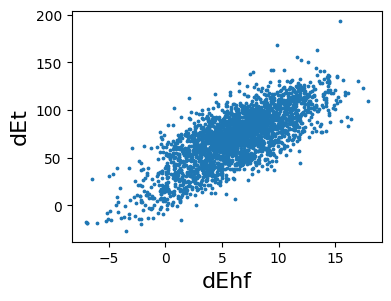

In [6]:
# \delta E_{HF}
hifdot = np.dot(scores, hif)
# \delta E_{T}
alldot = np.sum(scores, axis=1)

# Visualization(可视化)
plt.figure(dpi=100,figsize=(4,3))
plt.scatter(hifdot, alldot, s=3)
plt.xlabel('dEhf', fontsize=16)
plt.ylabel('dEt', fontsize=16)
plt.show()

# Sampling from low-$\Delta E_{HF}$ region to high-$\Delta E_{HF}$ region (Sliding methods)

从低 ΔEHF 区域到高 ΔEHF 区域采样（滑动方法）

In [7]:
# If you would like to generate MSA-hints by yourself.
# You can also use the pre-geenrated MSA-hints.
# 如果您想自己生成 MSA 提示。
# 您也可以使用预先生成的 MSA 提示。
!mkdir self_generate    #MSA序列文件
!mkdir self_generate/circ50
!mkdir self_generate/circ50higher
!mkdir self_generate/sampling400

In [8]:
# To select sequences around a dot (dE_HF, dE_T)
# 选择点周围的序列（dE_HF，dE_T）
def a_given_point(x, y):
    dis = [np.sqrt(7.7**2*(hifdot[i]-x)**2 + (alldot[i]-y)**2)
           for i in range(len(alldot))]
    sorted_indices = np.argsort(dis)
    idx = sorted_indices[:50]
    return(idx)

# To get the minimal distance from the sequences to a chosen dot (dE_HF, dE_T)
# 获取从序列到选定点的最小距离 (dE_HF, dE_T)
def a_given_point_min(x, y):
    # To be used to see whether a sampling is successful in [Random sampling 400 times]
    # 用于判断采样是否成功[随机采样400次]
    dis = [np.sqrt(7.7**2*(hifdot[i]-x)**2 + (alldot[i]-y)**2)
           for i in range(len(alldot))]
    sorted_indices = np.argsort(dis)
    return(min(dis))

# Sliding Results (dEhf_dEt)
# This is Fig3C
# 滑动结果 (dEhf_dEt)
# #############################################
for i in range(40):
    num = i/2-5
    idx = a_given_point(num, 0)
    with open('self_generate/circ50/circ'+str(i)+'.a3m', 'w') as fo:
        fo.write('>101\n')
        fo.write("MRIILLGAPGAGKGTQAQFIMEKYGIPQISTGDMLRAAVKSGSELGKQAKDIMDAGKLVTDELVIALVKERIAQEDCRNGFLLDGFPRTIPQADAMKEAGINVDYVLEFDVPDELIVDRIVGRRVHAPSGRVYHVKFNPPKVEGKDDVTGEELTTRKDDQEETVRKRLVEYHQMTAPLIGYYSKEAEAGNTKYAKVDGTKPVAEVRADLEKILG\n")
        count = 0
        for j in idx:
            fo.write('>'+str(count)+'\n')
            fo.write(allseqs[j])
# #############################################

# Additional Examples!
# Random sampling Results upon Higher dEt
# This is Fig5A
# 其他示例！
# 更高 dEt 的随机抽样结果
# 这是图 5A
# #############################################
for ene_all in [20, 30, 40, 50, 60, 70, 80, 90, 100, 110]:
    idxbox = [i for i in range(len(alldot)) if np.abs(
        alldot[i]-ene_all) < 10 and hifdot[i] > 0]
    for i in range(30):
        idx = np.random.choice(idxbox, size=50, replace=False)
        with open('self_generate/circ50higher/circ'+str(ene_all)+'_'+str(i)+'.a3m', 'w') as fo:
            fo.write('>101\n')
            fo.write("MRIILLGAPGAGKGTQAQFIMEKYGIPQISTGDMLRAAVKSGSELGKQAKDIMDAGKLVTDELVIALVKERIAQEDCRNGFLLDGFPRTIPQADAMKEAGINVDYVLEFDVPDELIVDRIVGRRVHAPSGRVYHVKFNPPKVEGKDDVTGEELTTRKDDQEETVRKRLVEYHQMTAPLIGYYSKEAEAGNTKYAKVDGTKPVAEVRADLEKILG\n")
            count = 0
            for j in idx:
                fo.write('>'+str(count)+'\n')
                fo.write(allseqs[j])
                count += 1
# #############################################

# Additional Examples!
# Random sampling 400 times
# This is Fig2E
# 附加示例！
# 随机抽样 400 次
# 这是图 2E
# #############################################
boxxy = []
for i in range(400):
    ifsuccess = False
    while ifsuccess == False:
        x = np.random.random()*27-7
        y = np.random.random()*150-20
        if a_given_point_min(x, y) < 2:
            ifsuccess = True
            boxxy.append([x, y])
        idxs = a_given_point(x, y)
        with open('self_generate/sampling400/samp'+str(i)+'.a3m', 'w') as fo:
            fo.write('>101\n')
            fo.write("MRIILLGAPGAGKGTQAQFIMEKYGIPQISTGDMLRAAVKSGSELGKQAKDIMDAGKLVTDELVIALVKERIAQEDCRNGFLLDGFPRTIPQADAMKEAGINVDYVLEFDVPDELIVDRIVGRRVHAPSGRVYHVKFNPPKVEGKDDVTGEELTTRKDDQEETVRKRLVEYHQMTAPLIGYYSKEAEAGNTKYAKVDGTKPVAEVRADLEKILG\n")
            count = 0
            for j in idxs:
                fo.write('>'+str(count)+'\n')
                fo.write(allseqs[j])
                count += 1
# #############################################

### AF2 Predictions
Consuming about 1-2 minutes per prediction using the default T4.

使用默认的 T4，每次预测大约需要 1-2 分钟。

In [ ]:
# Running Predictions
# Time consuming. You can continue with our pre-generated data.
# 运行预测
# 耗时。您可以继续使用我们预先生成的数据
!mkdir predicted
n_recycles = 3
model_number = 3
seed=0
runner = make_model_runner(model_num=model_number, recycles=n_recycles)
# Please change to the dir you would like to run
# 请更改为您想要运行的MSA目录
MSA_hints = glob('AFF2024/AdK/Frustration-Energy-space/circ50/*.a3m')    #MSA数据
count=0

for fil in MSA_hints:
  if os.path.exists('./predicted/'+ os.path.basename(fil).replace('.a3m','.pdb'))== False:
    features = make_processed_feature_dict(runner, fil, seed=seed)
    result = parse_results(runner.predict(features, random_seed=seed), features)
    pae = np.array(result['pae'])
    np.save('predicted/pae_' + os.path.basename(fil).replace('.a3m','_0.npy'), pae)
    write_results(result, 'predicted/' + os.path.basename(fil).replace('.a3m','.pdb'))
    count += 1

print('finished count:'+str(count))

### Results Analysis

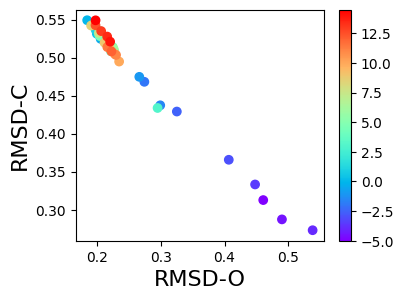

In [10]:
# Example: Sliding Results (dEhf_dEt) Fig3C
# 示例：滑动结果 (dEhf_dEt) 图 3C
import mdtraj as md

allbox1 = []
allbox2 = []
allpdb = []
hist = []

# Please replace the pdbdir and numbers with corresponding name and value.
# 请用相应的名称和值替换 pdbdir 和数字。
pdbdir = 'AFF2024/AdK/Frustration-Energy-space/Predicted_results/circ50_results/'   #预测结果PDB文件
bigbox = []
openpdb = md.load_pdb('AFF2024/AdK/Frustration-Energy-space/openCA.pdb')    #预测结果PDB文件
closedpdb = md.load_pdb('AFF2024/AdK/Frustration-Energy-space/closedCA.pdb')    #预测结果PDB文件
for roll in [0]:
    box1 = []
    box2 = []
    for num in np.arange(40):
        num = str(num)
        pdbfile = pdbdir + 'circ'+str(num)+ '.pdb'
        pdb = md.load_pdb(pdbfile)
        allpdb.append(pdb)
        atoms = pdb.top.select('name CA')
        pdb = pdb.atom_slice(atoms)
        pdb.superpose(openpdb, 0)
        d1 = md.rmsd(pdb, openpdb)
        pdb.superpose(closedpdb, 0)
        d2 = md.rmsd(pdb, closedpdb)
        box1.append(d1[0])
        box2.append(d2[0])
    allbox1.extend(box1)
    allbox2.extend(box2)

# Visualization, with colorbar showing the values of dE_HF
# 可视化，用颜色条显示 dE_HF 的值
plt.figure(dpi=100,figsize=(4,3))
plt.scatter(allbox1, allbox2, c=np.arange(len(allbox1))/2-5, cmap='rainbow')
plt.xlabel('RMSD-O', fontsize=16)
plt.ylabel('RMSD-C', fontsize=16)
plt.colorbar()
plt.show()

Text(0, 0.5, 'Total_Energy')

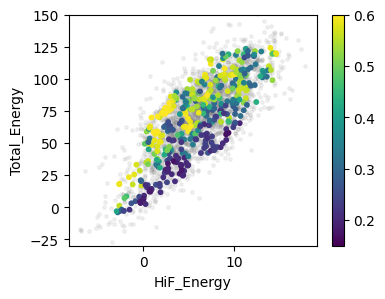

In [11]:
# Additional Examples!
# Examples: 400 samplings
# 更多示例！
# 示例：400 个样本
boxxy = []
rmsd = []
closedpdb = md.load_pdb('AFF2024/AdK/Frustration-Energy-space/closedCA.pdb')    #预测结果PDB文件
openpdb = md.load_pdb('AFF2024/AdK/Frustration-Energy-space/openCA.pdb')    #预测结果PDB文件

for roll in range(0,400):
    a3m = 'AFF2024/AdK/Frustration-Energy-space/sampling400/samp'+str(roll)+'.a3m'
    seqs = a3m_seq_keep(a3m)
    idxs = [allseqs.index(i) for i in seqs]
    x = np.mean(hifdot[idxs])
    y = np.mean(alldot[idxs])
    boxxy.append([x,y])
    pdb = 'AFF2024/AdK/Frustration-Energy-space/Predicted_results/sampling400_results/samp'+str(roll)+'.pdb'
    pdb = md.load_pdb(pdb)
    pdb = pdb.atom_slice(pdb.top.select('name CA'))
    rmsdc = md.rmsd(pdb, closedpdb)[0]
    rmsdo = md.rmsd(pdb, openpdb)[0]
    rmsd.append([rmsdc, rmsdo])

boxxy = np.array(boxxy)
rmsd = np.array(rmsd)

# Visualization with the color refering to RMSD-O
# 可视化颜色参考 RMSD-O
plt.figure(dpi=100, figsize=(4,3))
plt.scatter(hifdot, alldot, s=6, c='gray', alpha=0.1, marker='o')
plt.scatter(boxxy[:, 0], boxxy[:, 1], c=rmsd[:, 1], s=10, vmin=0.15, vmax=0.6)
plt.colorbar()
plt.ylim(-30,150)
plt.xlabel('HiF_Energy')
plt.ylabel('Total_Energy')

# Generating metastable state (AdK open state) and also conformational changing pathway using mixing methods

1. Closed MSA Hints with low d_E_{HF} values (size 500) vs. Open MSA Hints with high d_E_{HF} values (size 50) --> Mixing50, w: 0.01~0.4; (since size 500 is a large values, w=0.4 is already big enough to see fully closed structures.)

2. Closed MSA Hints with low d_E_{HF} values (size 500) vs. Open MSA Hints with high d_E_{HF} values (size 100) --> Mixing100, w: 0.01~0.09; (since size 500 is a large values, plus adding the MSA set size would bias the closed state, w=0.09 is already big enough to see fully closed structures.)

d_E_{HF} 值较低的封闭 MSA 提示（大小 500）与 d_E_{HF} 值较高的开放 MSA 提示（大小 50）--> Mixing50，w：0.01~0.4；（由于大小 500 是一个较大的值，w=0.4 已经足够大，可以看到完全封闭的结构。）

In [15]:
# Mixing Function
def mix_msa(msafile1, msafile2, ratio):
    seq1 = a3m_seq_keep(msafile1)
    seq2 = a3m_seq_keep(msafile2)
    np.random.shuffle(seq1)
    np.random.shuffle(seq2)
    N1 = len(seq1)
    N2 = len(seq2)
    seq1 = seq1[:int(N1*ratio)]
    seq2 = seq2[:N2 - int(N2*ratio)]
    seq1.extend(seq2)
    np.random.shuffle(seq1)
    return(seq1)

# Chosen Sequences to Output MSA Hints
# 选择序列输出 MSA 提示
def seq_to_a3m(seq, outfile):
    with open(outfile, 'w') as fo:
        natseq = "MRIILLGAPGAGKGTQAQFIMEKYGIPQISTGDMLRAAVKSGSELGKQAKDIMDAGKLVTDELVIALVKERIAQEDCRNGFLLDGFPRTIPQADAMKEAGINVDYVLEFDVPDELIVDRIVGRRVHAPSGRVYHVKFNPPKVEGKDDVTGEELTTRKDDQEETVRKRLVEYHQMTAPLIGYYSKEAEAGNTKYAKVDGTKPVAEVRADLEKILG"  # Example sequence
        fo.write('>101\n')
        fo.write(natseq+'\n')
        for i in range(len(seq)):
            fo.write('>'+str(i)+'\n')
            fo.write(seq[i])



!mkdir self_generate/Mixing50
!mkdir self_generate/Mixing100

# 1. Mixing 50
msafile1 = 'AFF2024/AdK/AdK-mixing/Closed500.a3m'    #MSA文件
msafile2 = 'AFF2024/AdK/AdK-mixing/Open50.a3m'    #MSA文件
for ratio in [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
    0.1, 0.2, 0.3, 0.4]:
    for roll in range(10):
        seq = mix_msa(msafile1, msafile2, ratio)
        outfile = 'self_generate/Mixing50/mix'+str(round(ratio, 3))+'_'+str(roll)+'.a3m'
        seq_to_a3m(seq, outfile)

# 2. Mixing 100
msafile1 = 'AFF2024/AdK/AdK-mixing/Closed500.a3m'    #MSA文件
msafile2 = 'AFF2024/AdK/AdK-mixing/Open100.a3m'    #MSA文件
for ratio in [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]:
    for roll in range(10):
        seq = mix_msa(msafile1, msafile2, ratio)
        outfile = 'self_generate/Mixing100/mix'+str(round(ratio, 3))+'_'+str(roll)+'.a3m'
        seq_to_a3m(seq, outfile)

mkdir: cannot create directory ‘self_generate/Mixing50’: File exists
mkdir: cannot create directory ‘self_generate/Mixing100’: File exists


### AF2 Predictions

In [ ]:
# Running Predictions
# Time consuming. You can continue with our pre-generated data.
# 运行预测
# 耗时。您可以继续使用我们预先生成的数据。
n_recycles = 3
model_number = 3
seed=0
runner = make_model_runner(model_num=model_number, recycles=n_recycles)
# Please change to the dir you would like to run
# 请更改为您想要运行的目录
MSA_hints = glob('AFF2024/AdK/AdK-mixing/Mixing100/*.a3m')    #MSA文件
count=0

for fil in MSA_hints:
  if os.path.exists('./predicted/'+ os.path.basename(fil).replace('.a3m','.pdb'))== False:
    features = make_processed_feature_dict(runner, fil, seed=seed)
    result = parse_results(runner.predict(features, random_seed=seed), features)
    pae = np.array(result['pae'])
    np.save('predicted/pae_' + os.path.basename(fil).replace('.a3m','_0.npy'), pae)
    write_results(result, 'predicted/' + os.path.basename(fil).replace('.a3m','.pdb'))
    count += 1

print('finished count:'+str(count))

### Results Analysis

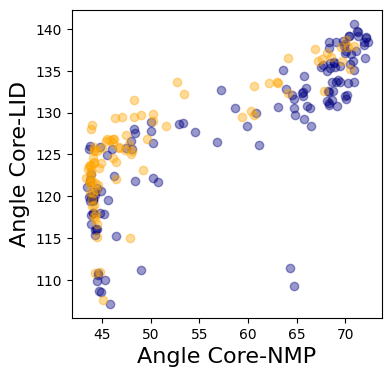

In [16]:
# Now we use angles for visualizing the conformational changing pathway.
# If you would like to view the resulting RMSDs, please use the same way as
# "Sampling from low-dE_HF  region to high-dE_HF  region (Sliding methods" - "Results Analysis"
# First we merge the generated structrues (PDBs) into a single trajectory
# 现在我们使用角度来可视化构象变化途径。
# 如果您想查看结果的 RMSD，请使用与
# “从低 dE_HF 区域到高 dE_HF 区域的采样（滑动方法）-“结果分析”相同的方式
# 首先，我们将生成的结构（PDB）合并为单个轨迹
def merge_pdb_files(directory):
    # List to store individual trajectories
    # 列表存储单个轨迹
    traj_list = []
    # Iterate over all files in the directory
    # 遍历目录中的所有文件
    for filename in sorted(os.listdir(directory)):
        if filename.endswith('.pdb'):
            # Load each PDB file and append to the traj_list
            # 加载每个 PDB 文件并附加到 traj_list
            filepath = os.path.join(directory, filename)
            traj = md.load(filepath)
            traj_list.append(traj)
    # Concatenate all trajectories into a single trajectory
    # 将所有轨迹连接成一条轨迹
    if traj_list:
        combined_traj = md.join(traj_list)
        return combined_traj
    else:
        raise ValueError("No PDB files found in the directory")


def get_angle_lst(directory):
  traj = merge_pdb_files(directory)
  # Definition of Angles
  # 角度的定义
  CAs = traj.top.select('name CA')
  corelid = [i for i in traj.top.select('resid >= 114') if i in traj.top.select('resid <= 124')]
  corelid = [i for i in corelid if i in CAs]
  core = [i for i in traj.top.select('resid >= 89') if i in traj.top.select('resid <= 99')]
  core = [i for i in core if i in CAs]
  nmp = [i for i in traj.top.select('resid >= 34') if i in traj.top.select('resid <= 54')]
  nmp = [i for i in nmp if i in CAs]
  core2 = [i for i in traj.top.select('resid >= 178') if i in traj.top.select('resid <= 184')]
  core2 = [i for i in core2 if i in CAs]
  lid = [i for i in traj.top.select('resid >= 124') if i in traj.top.select('resid <= 152')]
  lid = [i for i in lid if i in CAs]
  corelidxyz = np.mean(np.array([traj.xyz[:,i,:] for i in corelid]), axis=0)
  corexyz = np.mean(np.array([traj.xyz[:,i,:] for i in core]), axis=0)
  core2xyz = np.mean(np.array([traj.xyz[:,i,:] for i in core2]), axis=0)
  nmpxyz = np.mean(np.array([traj.xyz[:,i,:] for i in nmp]), axis=0)
  lidxyz = np.mean(np.array([traj.xyz[:,i,:] for i in lid]), axis=0)

  # Calculation of Angles
  # 角度计算
  ang1s = []
  ang2s = []
  for frame in range(len(traj)):
      corelid_core = np.linalg.norm(corelidxyz[frame] - corexyz[frame])
      core_nmp = np.linalg.norm(nmpxyz[frame] - corexyz[frame])
      corelid_nmp = np.linalg.norm(corelidxyz[frame] - nmpxyz[frame])

      core2_corelid = np.linalg.norm(core2xyz[frame] - corelidxyz[frame])
      corelid_lid = np.linalg.norm(corelidxyz[frame] - lidxyz[frame])
      core2_lid = np.linalg.norm(core2xyz[frame] - lidxyz[frame])

      ang1 = np.arccos((corelid_core**2 + core_nmp**2 - corelid_nmp**2)/2/corelid_core/core_nmp)/np.pi*180
      ang2 = np.arccos((core2_corelid**2 + corelid_lid **2 - core2_lid**2)/2/core2_corelid/corelid_lid)/np.pi*180

      ang1s.append(ang1)
      ang2s.append(ang2)
  return ang1s, ang2s

directory = 'AFF2024/AdK/AdK-mixing/Mixing50_results/'    #混合结果文件
ang1s_50, ang2s_50 = get_angle_lst(directory)
directory = 'AFF2024/AdK/AdK-mixing/Mixing100_results/'    #混合结果文件
ang1s_100, ang2s_100 = get_angle_lst(directory)

# Visualization
# 可视化

plt.figure(dpi=100, figsize=(4,4))
plt.scatter(ang1s_50, ang2s_50, c='navy', alpha=0.4, marker='o')
plt.scatter(ang1s_100, ang2s_100, c='orange', alpha=0.4, marker='o')
plt.xlabel('Angle Core-NMP', fontsize=16)
plt.ylabel('Angle Core-LID', fontsize=16)
plt.show()

# Generating metastable state (AdK open state) and also conformational changing pathway using HF-site masking methods
Here we show the results of masking the top 30 HF/MF sites with ratio=0.5.

这里我们展示了以比例=0.5 屏蔽前 30 个 HF/MF 站点的结果。

In [17]:
# Masking the top 30 HF sites with ratio=0.5
# 以比例=0.5 屏蔽前 30 个 HF 站点
!mkdir self_generate/erase_highFrus
!mkdir self_generate/erase_lowFrus
sorted_indices = np.argsort(hif)[::-1]
msafile = 'AFF2024/AdK/AdK-erasing/original50.a3m'    #MSA文件
for ratio in [0.5]: # Change this into 0.1~0.9 to reproduce erase_highFrus_various_ratio
    for roll in np.arange(80):
        lst = sorted_indices[:30]
        ratio = round(ratio,1)
        newseqs = []
        seqs = a3m_seq_keep(msafile)
        for seq in seqs:
            dice = np.random.random()
            if dice < ratio:
                seq = list(seq)
                for bar in lst:
                    seq[bar] = '-'
                seq = ''.join(seq)
            newseqs.append(seq)
        with open('self_generate/erase_highFrus/erase'+str(ratio)+'_'+str(roll)+'.a3m', 'w') as fo:
            fo.write('>101\n')
            fo.write('MRIILLGAPGAGKGTQAQFIMEKYGIPQISTGDMLRAAVKSGSELGKQAKDIMDAGKLVTDELVIALVKERIAQEDCRNGFLLDGFPRTIPQADAMKEAGINVDYVLEFDVPDELIVDRIVGRRVHAPSGRVYHVKFNPPKVEGKDDVTGEELTTRKDDQEETVRKRLVEYHQMTAPLIGYYSKEAEAGNTKYAKVDGTKPVAEVRADLEKILG\n')
            for seq in range(len(newseqs)):
                fo.write('>'+str(seq)+'\n')
                fo.write(newseqs[seq])

# Masking the top 30 MF sites with ratio=0.5
# 以比例 0.5 屏蔽排名前 30 的 MF 站点
sorted_indices = np.argsort(lof)[::-1]
for ratio in [0.5]: # Change this into 0.1~0.9 to reproduce erase_lowFrus_various_ratio
    for roll in np.arange(80):
        lst = sorted_indices[:30]
        ratio = round(ratio,1)
        newseqs = []
        seqs = a3m_seq_keep(msafile)
        for seq in seqs:
            dice = np.random.random()
            if dice < ratio:
                seq = list(seq)
                for bar in lst:
                    seq[bar] = '-'
                seq = ''.join(seq)
            newseqs.append(seq)
        with open('self_generate/erase_lowFrus/erase'+str(ratio)+'_'+str(roll)+'.a3m', 'w') as fo:
            fo.write('>101\n')
            fo.write('MRIILLGAPGAGKGTQAQFIMEKYGIPQISTGDMLRAAVKSGSELGKQAKDIMDAGKLVTDELVIALVKERIAQEDCRNGFLLDGFPRTIPQADAMKEAGINVDYVLEFDVPDELIVDRIVGRRVHAPSGRVYHVKFNPPKVEGKDDVTGEELTTRKDDQEETVRKRLVEYHQMTAPLIGYYSKEAEAGNTKYAKVDGTKPVAEVRADLEKILG\n')
            for seq in range(len(newseqs)):
                fo.write('>'+str(seq)+'\n')
                fo.write(newseqs[seq])

### AF2 Prediction

In [ ]:
# Running Predictions
# Time consuming. You can continue with our pre-generated data.
n_recycles = 3
model_number = 3
seed=0
runner = make_model_runner(model_num=model_number, recycles=n_recycles)
# Please change to the dir you would like to run
MSA_hints = glob('AFF2024/AdK/AdK-erasing/erase_highFrus/*.a3m')    #MSA文件
count=0

for fil in MSA_hints:
  if os.path.exists('./predicted/'+ os.path.basename(fil).replace('.a3m','.pdb'))== False:
    features = make_processed_feature_dict(runner, fil, seed=seed)
    result = parse_results(runner.predict(features, random_seed=seed), features)
    pae = np.array(result['pae'])
    np.save('predicted/pae_' + os.path.basename(fil).replace('.a3m','_0.npy'), pae)
    write_results(result, 'predicted/' + os.path.basename(fil).replace('.a3m','.pdb'))
    count += 1

print('finished count:'+str(count))

### Results Analysis
Here we use the distribution of RMSD to show that only the uncertainty upon HF-sites can effectively push the prediction out of the native state.

这里我们使用 RMSD 分布来表明只有 HF 位点的不确定性才能有效地将预测推离原生状态。

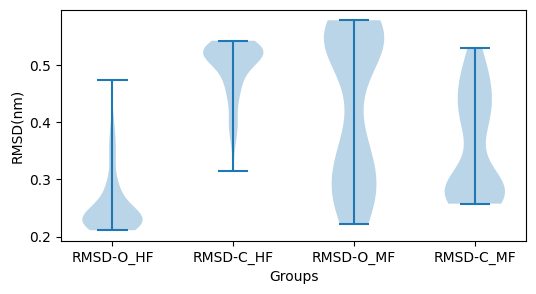

In [19]:
# Collecting the results after masking HF/MF sites.
# 屏蔽 HF/MF 站点后收集结果。
def get_rmsds(pdbdir):
  bigbox = []
  openpdb = md.load_pdb('AFF2024/AdK/Frustration-Energy-space/openCA.pdb')    #结果文件
  closedpdb = md.load_pdb('AFF2024/AdK/Frustration-Energy-space/closedCA.pdb')    #结果文件
  allbox1 = []
  allbox2 = []
  for roll in [0]:
      box1 = []
      box2 = []
      for num in np.arange(80):
          num = str(num)
          pdbfile = pdbdir + 'erase0.5_'+str(num)+ '.pdb'
          pdb = md.load_pdb(pdbfile)
          allpdb.append(pdb)
          atoms = pdb.top.select('name CA')
          pdb = pdb.atom_slice(atoms)
          pdb.superpose(openpdb, 0)
          d1 = md.rmsd(pdb, openpdb)
          pdb.superpose(closedpdb, 0)
          d2 = md.rmsd(pdb, closedpdb)
          box1.append(d1[0])
          box2.append(d2[0])
      allbox1.extend(box1)
      allbox2.extend(box2)
  return allbox1, allbox2

# Please replace the pdbdir and numbers with corresponding name and value.
# 请用相应的名称和值替换 pdbdir 和数字。
pdbdir = 'AFF2024/AdK/AdK-erasing/erase_highFrus_results/'    #结果文件
allbox1_HF, allbox2_HF = get_rmsds(pdbdir)
pdbdir = 'AFF2024/AdK/AdK-erasing/erase_lowFrus_results/'    #结果文件
allbox1_MF, allbox2_MF = get_rmsds(pdbdir)

# Visualization
# 可视化
plt.figure(dpi=100,figsize=(6,3))
plt.violinplot([allbox1_HF, allbox2_HF, allbox1_MF, allbox2_MF])
labels = ['RMSD-O_HF', 'RMSD-C_HF', 'RMSD-O_MF', 'RMSD-C_MF']
plt.xticks([1, 2, 3, 4], labels)
plt.xlabel('Groups')
plt.ylabel('RMSD(nm)')
plt.show()

In [ ]:
#  Please refer to our Github for the complete codes.
#完整代码请参考我们的 Github。
#   _____ _                 _                        _
#  |_   _| |               | |                      | |
#    | | | |__   __ _ _ __ | | __  _   _  ___  _   _| |
#    | | | '_ \ / _` | '_ \| |/ / | | | |/ _ \| | | | |
#    | | | | | | (_| | | | |   <  | |_| | (_) | |_| |_|
#    \_/ |_| |_|\__,_|_| |_|_|\_\  \__, |\___/ \__,_(_)
#                                   __/ |
#                                  |___/